# Predictive Modeling Assignment 3
## ISLP Ch-3

#### imports and setup

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from ISLP import load_data
import random
from statsmodels.graphics.gofplots import ProbPlot


from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly
)

# My Own Functions
import sys
sys.path.append('./functions')
from home_brew import diagnostic_plots

%matplotlib inline

In [163]:
auto = load_data('Auto')

### QUESTION # 2 Carefully explain the differences between the KNN classifier and KNN regression methods.

- A KNN ***regression*** identifies the K training points closest to a given observation, then uses the average of that group to estimate the __quantitative__ value of that given observation.
- A KNN ***clasifier*** also identifies the k training points closest to the given observation but is used to predict __qualitative__ values

### QUESTION # 9 This question involves the use of multiple linear regression on the Auto data set. 
#### (a) Produce a scatterplot matrix which includes all of the variables in the data set.  

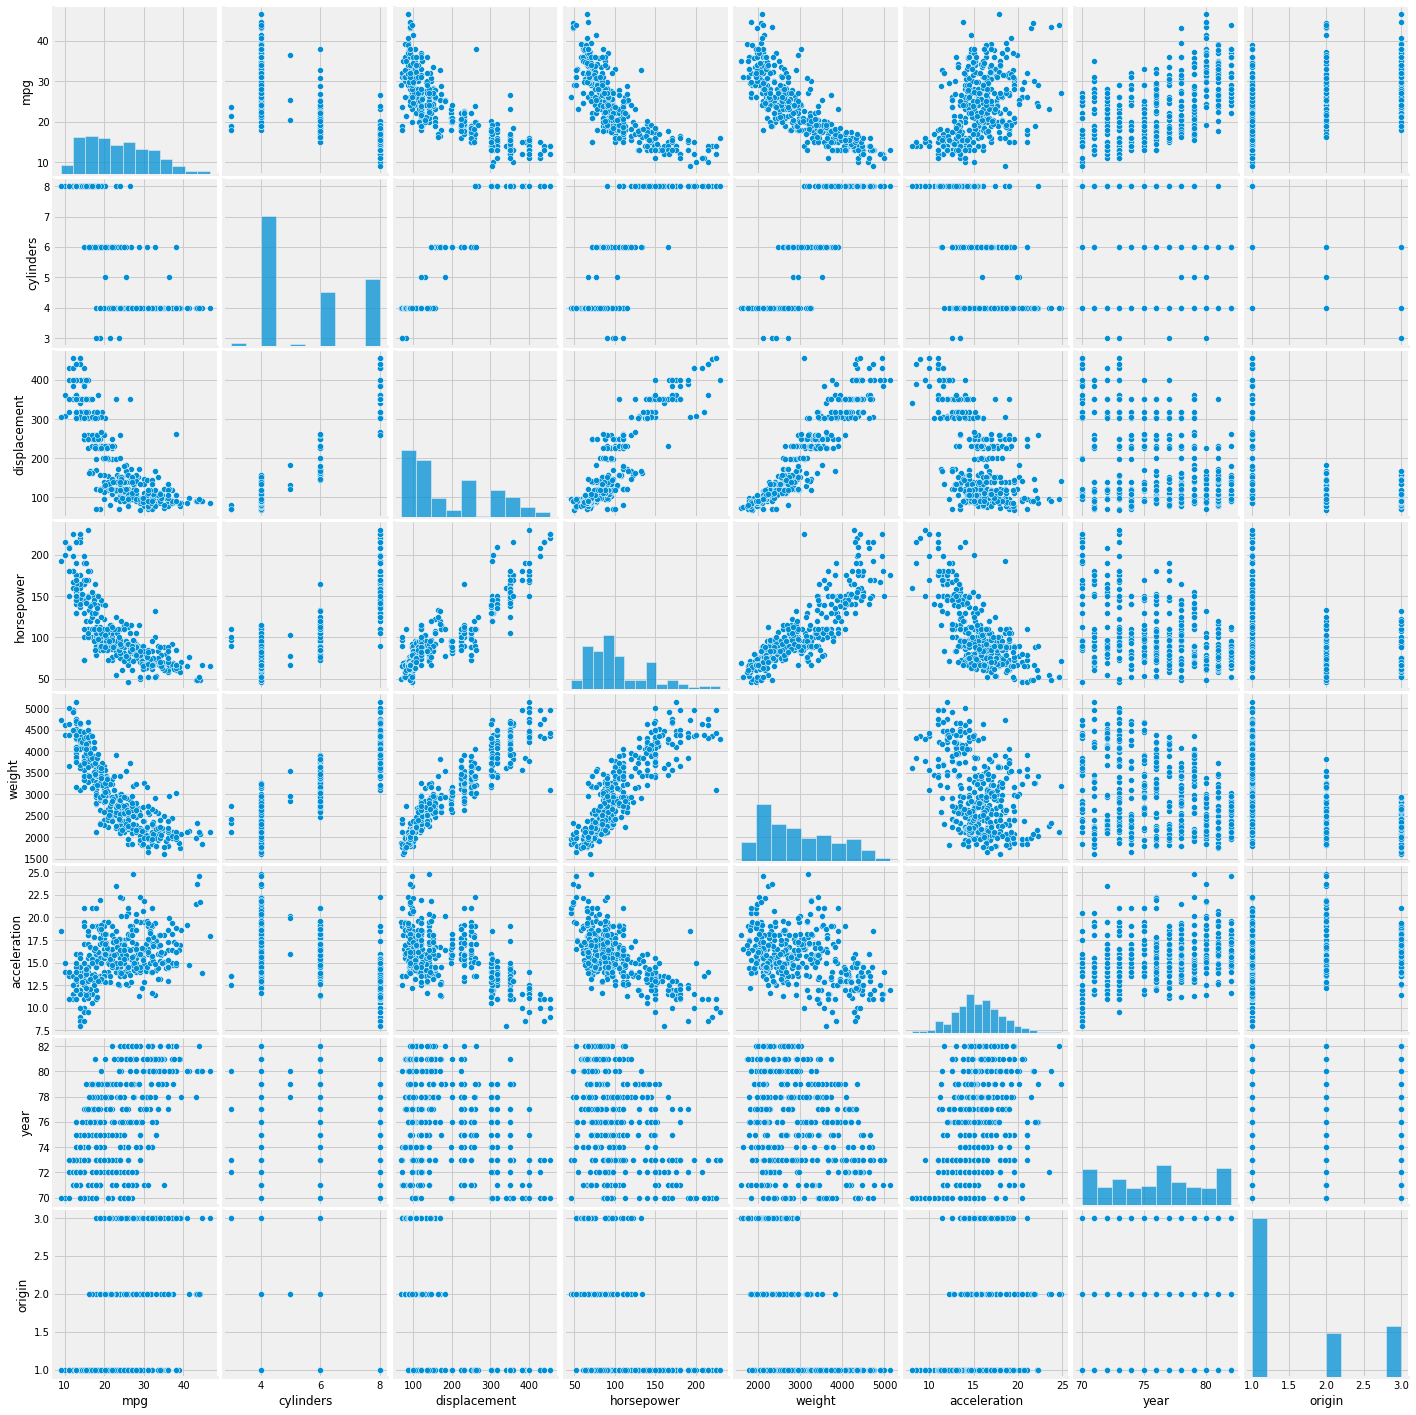

In [164]:
sns.pairplot(auto);

#### (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method. .corr() 

In [165]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### (c) 
Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results.

In [166]:
# set target var
y = auto['mpg']
# set indep vars 
terms = auto.columns.drop(['mpg', 'name'])
X = MS(terms).fit_transform(auto)
# fit model
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


Comment on the output. For instance: 
-   #### i. Is there a relationship between the predictors and the response? 
    - Yes with the exception of acceleration, all of the predictors have a significant relationship with the response

In [167]:
lm = ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto).fit()
anova_results = anova_lm(lm)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


-   #### ii.  Which predictors appear to have a statistically significant relationship to the response? 
    - Displacement, Weight, Year, Origin, (Cyliders is significant in the regression but not in the anova)
-   #### iii. What does the coefficient for the year variable suggest? 
    - It suggests that for each year increase of the vehicle, on average the mpg improves by .7508 MPG.

#### (d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

- The residual plots ___do not suggest___ any unusually large outliers
- the leverage plot ___does not___ identify any observations with unusually high leverage

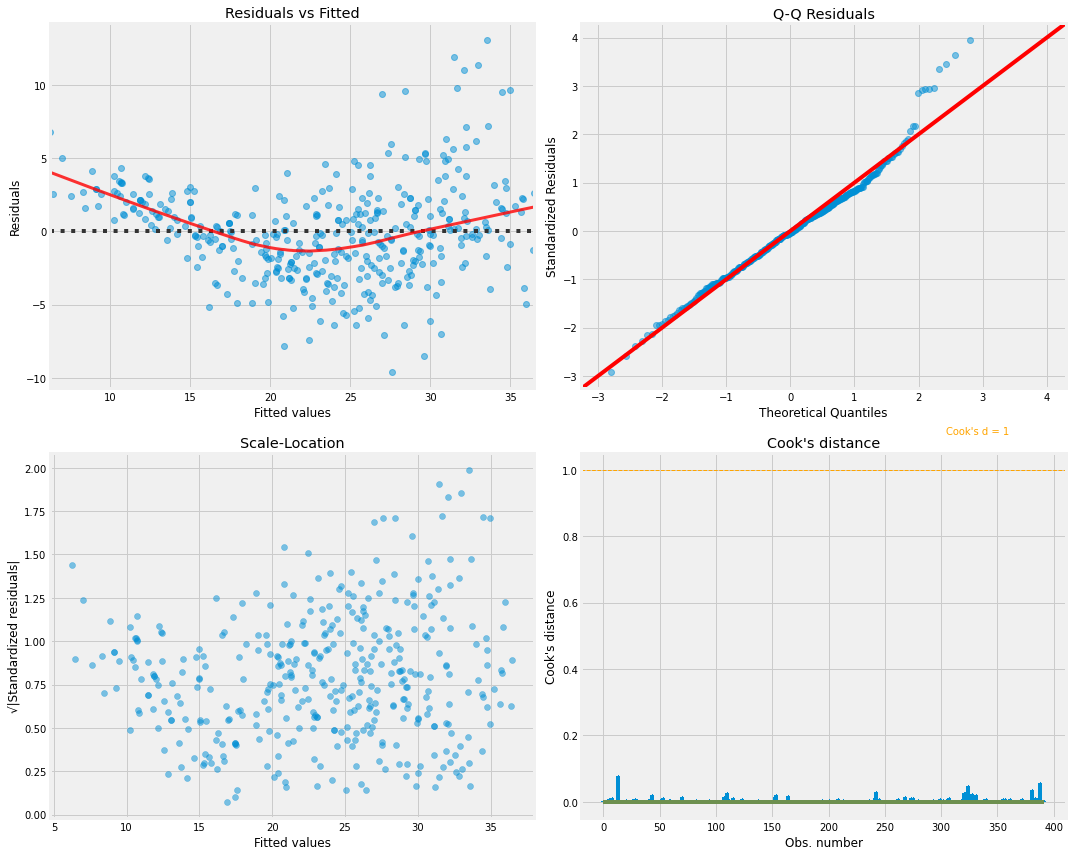

In [168]:
diagnostic_plots(lm,cooksd_prop=False)

#### (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant? 

In [169]:
# first with fit it without the insignifant variables

# set indep vars 
terms = auto.columns.drop(['mpg', 'name', 'acceleration', 'cylinders'])
terms
X = MS(terms).fit_transform(auto)
# fit model
model_no_accel_cyl = sm.OLS(y,X)
results_no_accel_cyl = model_no_accel_cyl.fit()
summarize(results_no_accel_cyl)

,coef,std err,t,P>|t|
intercept,-16.6939,4.120,-4.051,0.000
displacement,0.0114,0.006,2.054,0.041
horsepower,-0.0219,0.011,-2.033,0.043
weight,-0.0063,0.001,-11.124,0.000
year,0.7484,0.051,14.707,0.000
origin,1.3853,0.277,4.998,0.000


In [170]:
# set indep vars 

X = MS([
    'displacement',
    'horsepower',
    'weight',
    'year',
    'origin',
    ('year', 'origin'),
    ('weight','horsepower')]
).fit_transform(auto)

# fit model
model_interactions = sm.OLS(y,X)
results_interactions = model_interactions.fit()
summarize(results_interactions)

,coef,std err,t,P>|t|
intercept,15.959900,7.866000,2.029,0.043
displacement,0.003900,0.005000,0.781,0.435
horsepower,-0.213400,0.021000,-10.221,0.000
weight,-0.011200,0.001000,-16.121,0.000
year,0.570100,0.101000,5.659,0.000
origin,-8.546900,4.193000,-2.038,0.042
year:origin,0.120900,0.054000,2.242,0.026
weight:horsepower,0.000053,0.000005,10.390,0.000


- Both year:origin and weight:horsepower are significant

#### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [171]:
X = MS([
    'displacement',
    'horsepower',
    'weight',
    'year',
    'origin',
    poly('displacement', degree=2),
    poly('weight', degree=2)]
).fit_transform(auto)

# fit model
model_trans = sm.OLS(y,X)
results_trans = model_trans.fit()
summarize(results_trans)

,coef,std err,t,P>|t|
intercept,-17.6992,3.514,-5.036,0.000
displacement,0.0048,0.005,0.966,0.335
horsepower,-0.0443,0.010,-4.224,0.000
weight,-0.0053,0.001,-9.314,0.000
year,0.7866,0.045,17.323,0.000
origin,0.5132,0.261,1.970,0.050
"poly(displacement, degree=2)[0]",1.6629,0.330,5.036,0.000
"poly(displacement, degree=2)[1]",18.4024,5.146,3.576,0.000
"poly(weight, degree=2)[0]",3.1377,0.623,5.036,0.000
"poly(weight, degree=2)[1]",19.6501,4.428,4.438,0.000


-  Both transformations are significant

### QUESTION # 10 This question should be answered using the Carseats data set. (a) Fit a multiple regression model to predict Sales using Price Urban, and US.




In [172]:
carseats = load_data('Carseats')

In [173]:
X = MS([
    'Price',
    'Urban',
    'US']
).fit_transform(carseats)
y = carseats['Sales']

# fit model
model_a = sm.OLS(y,X)
results_a = model_a.fit()
summarize(results_a)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!



- Price: for every unit increase in price the sales decrease by .05
- Urban[Yes]: If Urban == Yes, than the average price decreases by .02
- US[Yes]: If US == Yes, then the average price increases by 1.2

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.


- y = -.05(price)  -.02(Urban) + 1.2(US) 
    - where Urban and US are 1s or 0s
    - 1 == yes
    - 0 == No

#### (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?
-    Price
-    US

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.


In [174]:
Xe = MS([
    'Price',
    'US']
).fit_transform(carseats)
y = carseats['Sales']

# fit model
model_e = sm.OLS(y,Xe)
results_e = model_e.fit()
summarize(results_e)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


#### (f) How well do the models in (a) and (e) fit the data?


In [175]:
print(f'MODEL-A:\t{np.sqrt(results_a.rsquared):.4}',
      f'\nMODEL-E:\t{np.sqrt(results_e.rsquared):.4}')

MODEL-A:	0.4892 
MODEL-E:	0.4891


#### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).


In [176]:
results_e.conf_int(.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


#### (h) Is there evidence of outliers or high leverage observations in the model from (e)?
    - no

In [177]:
vals = [VIF(Xe, i) 
        for i in range(1,Xe.shape[1])]

vif = pd.DataFrame(
    {
        'vif':vals
    }, index = Xe. columns[1:]
)
vif

,vif
Price,1.003359
US[Yes],1.003359


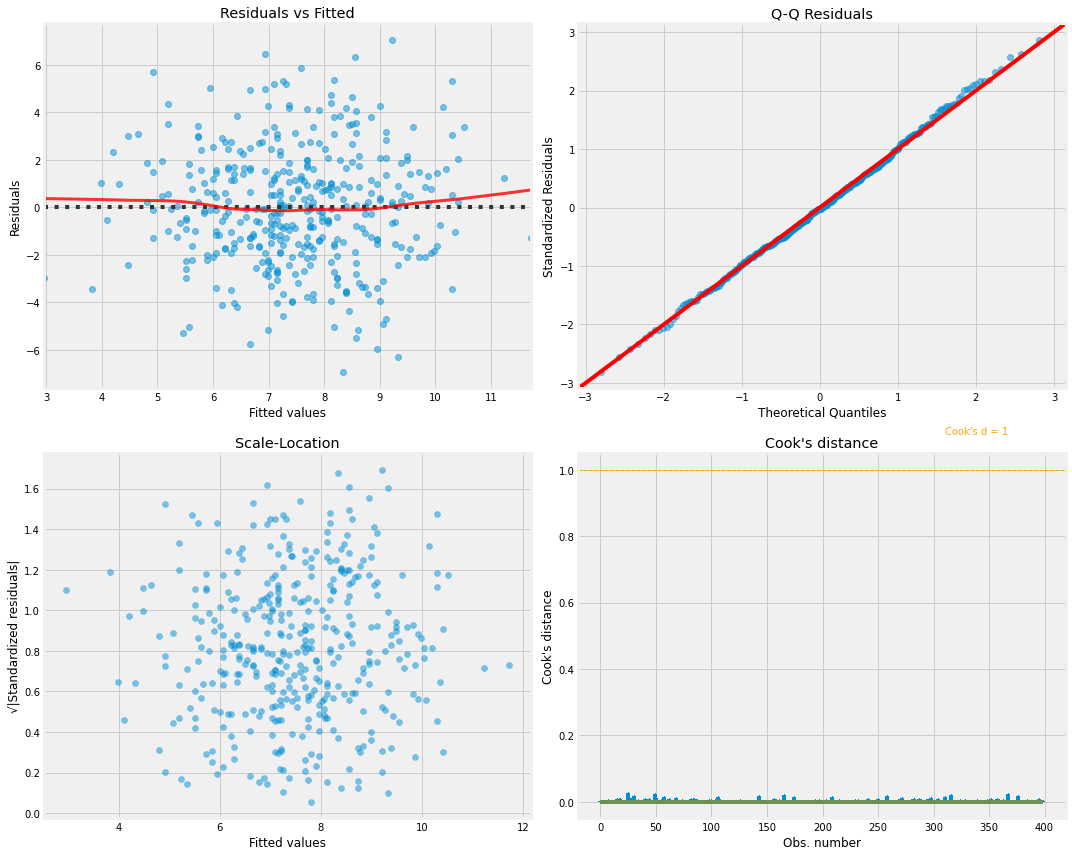

In [178]:
diagnostic_plots(model_e.fit())

### QUESTION # 12 This problem involves simple linear regression without an intercept. 
#### (a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X? 

-    $\sum_{}^{} X^2 == \sum_{}^{}Y^2$

#### (b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is ___different___ from the coefficient estimate for the regression of Y onto X. 

In [179]:
random.seed(123)
x = np.random.normal(
    loc=0,
    scale=1,
    size = 100
)

y = 2*x + 15
model1 = sm.OLS(y,x).fit()
model2 = sm.OLS(x,y).fit()

In [180]:
model1.params == model2.params

array([False])

#### (c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is ___the same___ as the coefficient estimate for the regression of Y onto X._

In [181]:
random.seed(123)
x = np.random.normal(
    loc=0,
    scale=1,
    size = 100
)

y = -x

model1 = sm.OLS(y,x).fit()
model2 = sm.OLS(x,y).fit()

In [182]:
model1.params == model2.params

array([ True])